<a href="https://colab.research.google.com/github/LargeMan/CAP4630/blob/master/HW_5/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5


# Part 1: General Concepts

**Artificial Intelligence** is a large field in computer science dedicated to developing algorithms that can perform tasks which typically require human intelligence. Such tasks include image and sound recognition, decision-making, language translation, etc. Subsets of AI include Machine Learning and Symbolic AI.

**Machine Learning**, coined by Arthur Samuel in 1959, is the "field of study that gives computers the ability to learn without being explicitly programmed". ML algorithms aim to adjust themselves in response to the input data, typically by somehow calculating performance; if performance improves in another iteration, the program has learned.

**Deep Learning**, also known as Neural Networks, is a subset of Machine Learning. Deep Learning is essentially a collection of algorithms which learns by creating networks of numerous layers, each consisting of various numbers of nodes and connected by weight values.





# Part 2: Basic Concepts

**Linear Regression** is a type of ML algorithm which learns a linear relationship between a set of datapoints. Essentially, it fits a line to said dataset, assuming the data set is two dimensional; for three dimensional, it will be a plane, and so on. This line/plane/hyperplane can be used to show a regressive relationship or act as a decision boundary between two classes for classification problems. For multiclassification, multiple linear relationships will be calculated and use in conjunction.

**Logistic Regression** is similar, and also outputs a linear relationship. It is mostly used for classification, despite the name. The key difference is that logistic regression utilizes the sigmoid function, which looks as follows:

\begin{equation*}
  \
    \dfrac{1}{1 + e^x}
  \
\end{equation*}

What this does is essentially force the final result to be a value between 0 and 1, and whatever end is closer to is the prediction. In addition, the logarithmic shape of the graph essentially penalizes confident and wrong predictions than those which are not particularly confident.

Below is an example of a logistic model implemented with keras.

Epoch 1/250
40/40 [==============================] - 0s 7ms/step - loss: 1.0553 - accuracy: 0.7200 - val_loss: 0.9452 - val_accuracy: 0.7285
Epoch 2/250
40/40 [==============================] - 0s 2ms/step - loss: 0.9595 - accuracy: 0.7207 - val_loss: 0.8733 - val_accuracy: 0.7287
Epoch 3/250
40/40 [==============================] - 0s 2ms/step - loss: 0.8754 - accuracy: 0.7211 - val_loss: 0.8020 - val_accuracy: 0.7287
Epoch 4/250
40/40 [==============================] - 0s 2ms/step - loss: 0.8198 - accuracy: 0.7220 - val_loss: 0.7296 - val_accuracy: 0.7290
Epoch 5/250
40/40 [==============================] - 0s 2ms/step - loss: 0.7323 - accuracy: 0.7224 - val_loss: 0.6633 - val_accuracy: 0.7295
Epoch 6/250
40/40 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.7229 - val_loss: 0.5981 - val_accuracy: 0.7315
Epoch 7/250
40/40 [==============================] - 0s 2ms/step - loss: 0.6032 - accuracy: 0.7248 - val_loss: 0.5353 - val_accuracy: 0.7343
Epoch 8/250
4

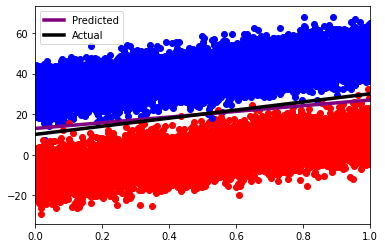

In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from mpl_toolkits.mplot3d import Axes3D


def get_random_data(w, b, mu, sigma, m):
  data = np.empty((m, 2))
  label = np.empty((m, 1))
  for i in range(m):
    c = np.random.randint(2)
    x = np.random.random()
    n = np.random.normal(mu, sigma)
    y = w * x + b + (-1)**c * n
    data[i][0] = x
    data[i][1] = y
    label[i] = c

  return (data, label)

def display_random_data(data, label, x=None, y=0, w=0, b=0):
  fig, ax = plt.subplots()
  ax.axis([0,1, np.amin(data)-5, np.amax(data)+5])
  fig.canvas.draw()
  red = mpl.patches.Patch(color='red', label='Class 1')
  blue = mpl.patches.Patch(color='blue', label='Class 0')

  for i in range(label.size):
    if label[i]:
      clr = "red"
    else:
      clr = "blue"
    ax.scatter(data[i][0], data[i][1], color=clr)
  # Plot prediction lines when relevant arguments are given
  if x is not None:
    ax.plot(x, y, lw = 3.5, c = 'purple', label='Predicted')
    ax.plot(x, (w*x + b), lw = 3.5, c ='black', label='Actual')
    ax.legend()
  else:
    ax.legend(handles=[red,blue])


data, labels = get_random_data(20, 10, 20, 6, 20000)

split_num = int(.8 * labels.size)
train_data = data[:split_num]
train_lbls = labels[:split_num]

test_data = data[split_num:]
test_lbls = labels[split_num:]

from tensorflow.python.keras import layers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation
from tensorflow.python.keras.losses import binary_crossentropy
from tensorflow.python.keras.regularizers import L1L2

# For a single-input model with 2 classes (binary classification):

model = Sequential()
#model.add(Dense(32, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid', input_shape=(2,)))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model, iterating on the data in batches of 512 samples
model.fit(data, labels, epochs=250, batch_size=512,
          validation_data=(test_data, test_lbls))
weights = model.get_weights()
# The weights will return [np.array([w1,w2]), np.array[b]]
#display_random_data(data, labels, weights)

xt = np.linspace(0,1,100)
w1 = weights[0][0][0]
w2 = weights[0][1][0]
b = weights[1][0]
print(weights)
py = (-w1/w2)*xt + (-b/w2)
display_random_data(data, labels, x=xt, y=py, w=20, b=10)

-------



The **Gradient** is, to put it midly, the set of partial derivatives of each feature in a dataset. What makes it useful is that it encodes the "direction" each feature of the dataset is going towards, and the magnitude of said direction.


This is utilized in the **Gradient Descent** technique. First, a random starting point must be picked; said point doesn't really matter much. Then, the algorithm calculates the gradient of the loss curve at that point. This gives the algorithm a magnitude and direction; the next point to be examined will be the point that is some part of this magnitude away (determined by the learning rate) in the direction of the negative gradient.

The below code is an example of Linear Regression using batch gradient descent (from Dr. Wocjan's [notebook](https://colab.research.google.com/drive/1qBxfTPoNcSFvpwu1NDl1V6cHEqL3aQl-))


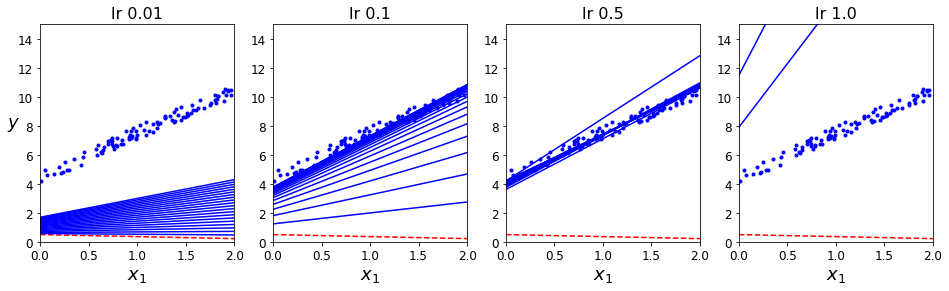

In [2]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# generate m random pairs (x, y)

m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.rand(m, 1)

# add x0 = 1 
X_b = np.column_stack([np.ones((m, 1)), X])
# create array with x1=0 and x1=2
X_new = np.array([[0], [2]])
# add x0 = 1 to each instance
X_new_b = np.column_stack([np.ones((2, 1)), X_new])

# number of epochs
epochs = 20
# learning rate
lr = 0.01
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(2, 1)

weight = initial_weight

for epoch in range(epochs):
    gradient = 1/m * X_b.T.dot(X_b.dot(weight) - y)
    weight = weight - lr * gradient

y_predict = X_new_b.dot(weight)

def plot_gradient_descent(weight, lr, weight_path=None):
    # plot training data
    plt.plot(X, y, "b.")
    # plot initial prediction
    y_predict = X_new_b.dot(weight)
    plt.plot(X_new, y_predict, "r--")
    
    if weight_path is not None:
      weight_path.append(weight)

    for epoch in range(epochs):
        gradient = 1 / m * X_b.T.dot(X_b.dot(weight) - y)
        weight = weight - lr * gradient
        if weight_path is not None:
            weight_path.append(weight)
        # plot prediction after weight update
        y_predict = X_new_b.dot(weight)
        plt.plot(X_new, y_predict, "b-")
        
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title("lr {}".format(lr), fontsize=16)

weight_path_bgd = []

plt.figure(figsize=(16, 4))
plt.subplot(141); plt.ylabel("$y$", rotation=0, fontsize=18); plot_gradient_descent(initial_weight, 0.01)
plt.subplot(142); plot_gradient_descent(initial_weight, 0.1, weight_path_bgd)
plt.subplot(143); plot_gradient_descent(initial_weight, 0.5)
plt.subplot(144); plot_gradient_descent(initial_weight, 1.0)
plt.show()

# Part 3: Building a Model

## Structure of a neural network
A **neural network** is a network that consists of various layers, a data structure which accepts one or more tensors as an input, and outputs one or several tensors as an output. These layers typically contain weights, and use these along with gradient descent to process the input, and together all these layers contain the knowledge of the network.

**Convolutional Neural Networks** (aka convnets) are basically neural networks that are optimized for image processing. Image data is typically stored in 4D tensors, and so a CNN's layers must account for this.

The overall CNN model is a linear stack of these layers.

The way each layer processes data can vary immensely. The below example shows two different ways to process input tensors, which work particularly well for images: convolution and maxpooling.

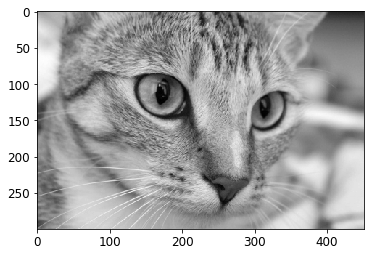

In [4]:
import math

def conv2d(input_mat: np.ndarray, kernel_mat: np.ndarray,
           stride=(1,1), pad='VALID', square=True):
  ''' Convolves an input matrix by an input kernel/mask '''
  
  # Error handling Suite
  # Check type
  if not (isinstance(input_mat, np.ndarray)
       or isinstance(kernel_mat, np.ndarray)):
    raise ValueError("ERROR: one or more inputs are not numpy arrays!")

  mask_size = kernel_mat.size
  # Check sizes
  if mask_size == 0 or input_mat.size == 0:
    raise ValueError("ERROR: input and/or kernel are empty!")

  if mask_size > input_mat.size:
    raise ValueError("ERROR: kernel is larger than input!")

  # Check if mask is not square (3x3, 5x5, etc)
  mask_len = kernel_mat[0].size
  input_size = input_mat.size
  input_len = input_mat[0].size
  if (mask_size/mask_len != mask_len
    or (input_size/input_len != input_len and square)):
    raise ValueError("ERROR: one or more inputs are not square!")

  
  try:
    # Get mask radius
    mr = int(mask_len/2)

    # return multiplication by scalar if kernel is 1x1 matrix
    if mr == 0: return input_mat * kernel_mat[0]

    # pad the array (or not if VALID)
    if pad == 'VALID':
      pad_mat = input_mat
      xshape = input_mat.shape[0] - mask_len + 1
      yshape = input_mat.shape[1] - mask_len + 1
    else:
      pad_mat = np.pad(input_mat, pad_width = mr, mode='constant',
                       constant_values=0)
      xshape, yshape = input_mat.shape
    
    # double flip the mask
    mask = np.flip(kernel_mat)

    # adjust mask end indices (to make the convolution logic work)
    if not (mask_len & 0x1):
      end = mr
    else:
      end = mr+1


    # Convolution performed below
    
    output_mat = np.zeros((int(xshape/stride[0]),
                           int(yshape/stride[1])))
    # Go through every applicable column and row
    for i in range(mr, xshape+mr, stride[0]):
      for j in range(mr, yshape+mr, stride[1]):
        sum1 = 0
        # Multiply corresponding mask & input elements and add total
        for p in range(-mr, end):
          for q in range(-mr, end):
            sum1 += pad_mat[i+p][j+q] * mask[p+mr][q+mr]
        output_mat[i-mr][j-mr] = sum1
  
  except Exception as e:
    print(e)
    return None

  return output_mat


import skimage.data
test_input = skimage.data.chelsea()
test_input = skimage.color.rgb2gray(test_input)
test_input.shape

maskX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
maskY = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

outX = conv2d(test_input, maskX, square=False)
outY = conv2d(test_input, maskY, square=False)

sobel = np.zeros(outX.shape)
maxval = 0

# get magnitudes
for i in range(outX.shape[0]):
  for j in range(outX.shape[1]):
    sobel[i][j] = math.sqrt((outX[i][j]**2)+(outY[i][j]**2))
    if sobel[i][j] > maxval:
      maxval = sobel[i][j]

# normalize (not necessarily required)
for i in range(outX.shape[0]):
  for j in range(outX.shape[1]):
    sobel[i][j] = (sobel[i][j]/maxval) * 255

plt.imshow(test_input, cmap='gray', interpolation='nearest')

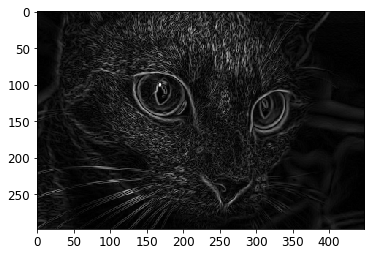

In [5]:
plt.imshow(sobel, cmap='gray', interpolation='nearest')

(37, 56)

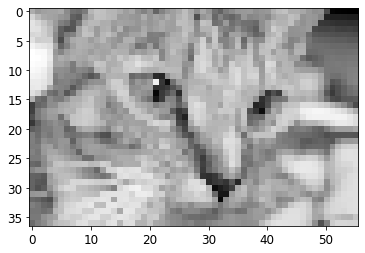

In [6]:
def maxpooling2d(input_mat: np.ndarray, s: int, square=True):
  ''' Maxpooling operation, where window is of size s*s '''

  window = s*s
  # Error if window is larger than input
  if window > input_mat.size:
    raise ValueError("ERROR: window size {} is larger " +
                     "than input size {}!".format(window, input_mat.size))
  # Error if input is not square (can be disabled with flag)
  if (input_mat.shape[0] != input_mat.shape[1]) and square:
    raise ValueError("ERROR: one or more inputs are not square!")


  h2 = int(input_mat.shape[0]/s)
  w2 = int(input_mat.shape[1]/s)

  output_mat = np.zeros((h2, w2))
  for i in range(s-1, input_mat.shape[0], s):
    for j in range(s-1, input_mat.shape[1], s):
      maxpool = 0
      for p in range(s):
        for q in range(s):
          maxpool = max(maxpool, input_mat[i-p][j-q])
      x = int(i/s)
      y = int(j/s)
      #print('{}'.format([x, y]))
      output_mat[x][y] = maxpool
      

  return output_mat

maxpooltest = maxpooling2d(test_input, 8, square=False)
plt.imshow(maxpooltest, cmap='gray', interpolation='nearest')
maxpooltest.shape

# Part 4: Compiling a Model

In order to optimize the model, an optimizer must be picked, as well as a loss function.

The loss function determines what quantity needs to be reduced. The network of the training will work to minimize this number. The lower the final result is, the more "successful" the model is.

An optimizer will determine will determine how the network is updated based on this loss function. Essentially, it picks a specific version of stochastic gradient descent that the network will use to update.

An example of a loss function is the binary cross-entropy loss, which is based on the sigmoid function. It is shown below:
\begin{equation*}
  \
    -\dfrac{1}{N} \sum_{i=1}^{N}(y_i *log(\dfrac{1}{1 + e^z})) - ((1-y_i) * log(1 - \dfrac{1}{1 + e^z}))
  \
\end{equation*}

where N is the number of training labels, z is the last layer of the network, and y is the corresponding label from the test set.

# Part 5: Training a Model

The whole goal of any machine learning model is to be able to find a pattern in a specific dataset, via the training set. This pattern will ideally make a correct prediction for any new data point that is fed to it (i.e. any datapoint thats not part of the training set). To achieve this ideal state is to be **generalized**. Generalization is important for any model, as otherwise the model would be useless.

There are two pitfalls when it comes to training models. The first of these is underfitting. To put it plainly, underfitting is when the model is completely inaccurate, and fails at both predicting the outcomes of the training set and the test set. It is usually very easy to detect underfitting.

The other pitfall is more insidious. This pitfall, called overfitting, is when the model predicts the training set very well, but fails at predicting new data points. In other words, the model is specifically suited for ONLY the training set. This is harder to determine, but the usage of a training set can prevent this in many cases.

# Part 6: Finetuning a pretrained model

A pretrained model can be finetuned by changing various aspects of it. For example, playing around with the various hyperparameters can increase accuracy if tuned right. A more complex way of fine tuning is changing the convnet base, or adding more layers, or adding dropout, etc.

The following example covers Parts 4-6 (it is a copy of homework 4, problem 3):

# Fine-tuning VGG16 

This is based on section 5.3 *Using a pretrained convnet* of the book *Deep learning with Python* by Francois Chollet. I have made several changes to the code. I use the data that is already provided by Google. I don't download the data from Kaggle as in the deep learning book.

## Feature extraction

Feature extraction consists of using the representations learned by a previous network to extract interesting features from new samples. These features are then run through a new classifier, which is trained from scratch.

We will use here the convolutional base of the VGG16 model to extract the features. We will feed these features to a densely connected classifier with dropout. We will fine-tune some layers.

## Download the data

Download the example data, a zip. of 2,000 JPG pictures of cats and dogs and extract it locally in ```/tmp```.



In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-04-21 23:17:37--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   107MB/s    in 0.6s    

2020-04-21 23:17:38 (107 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Note that the data provided by Google does not have a test set.

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

## Build network with VGG16 convolution base and custom densely connected layers

### Load the convolutional base

In [0]:
from keras.applications import MobileNet as MNet

conv_base = MNet(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))
#model.summary()

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 1s 0us/step


### Freeze the convolutional base

In [0]:
conv_base.trainable = False

### Concatenate the convolutional base and densely connected layers

In [0]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 4, 4, 1024)        3228864   
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               4194560   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 7,423,681
Trainable params: 4,194,817
Non-trainable params: 3,228,864
_________________________________________________________________


## Train the model end to end with frozen convolutional base

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# compile model

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=2e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 25s 248ms/step - loss: 0.4995 - acc: 0.7820 - val_loss: 0.2858 - val_acc: 0.9380
Epoch 2/30
100/100 [==============================] - 17s 171ms/step - loss: 0.3334 - acc: 0.8660 - val_loss: 0.2178 - val_acc: 0.9510
Epoch 3/30
100/100 [==============================] - 17s 171ms/step - loss: 0.2949 - acc: 0.8815 - val_loss: 0.0063 - val_acc: 0.9640
Epoch 4/30
100/100 [==============================] - 17s 171ms/step - loss: 0.2287 - acc: 0.9055 - val_loss: 0.0662 - val_acc: 0.9630
Epoch 5/30
100/100 [==============================] - 17s 168ms/step - loss: 0.2327 - acc: 0.8990 - val_loss: 0.0063 - val_acc: 0.9580
Epoch 6/30
100/100 [==============================] - 17s 173ms/step - loss: 0.2430 - acc: 0.9055 - val_loss: 0.7111 - val_acc: 0.9450
Epoch 7/30
100/100 [==============================] - 17s 170ms/step - loss: 0.2215 - acc: 0.9060 - val_lo

## Display curves of loss and accuracy during training

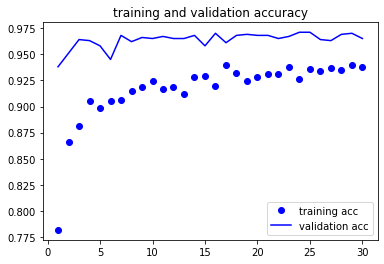

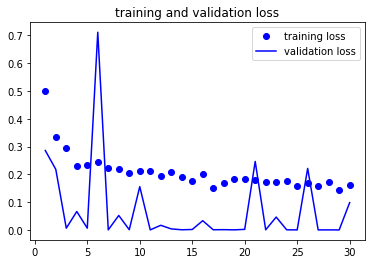

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

## Fine-tuning

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'conv_pw_12':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [0]:
# compile model

model.compile(
    loss='binary_crossentropy',
    #
    # choose a smaller learning rate
    #
    optimizer=optimizers.RMSprop(lr=1e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 20s 205ms/step - loss: 0.1511 - acc: 0.9460 - val_loss: 0.2446 - val_acc: 0.9650
Epoch 2/100
100/100 [==============================] - 18s 176ms/step - loss: 0.1434 - acc: 0.9380 - val_loss: 0.4203 - val_acc: 0.9550
Epoch 3/100
100/100 [==============================] - 18s 177ms/step - loss: 0.1286 - acc: 0.9500 - val_loss: 0.0076 - val_acc: 0.9630
Epoch 4/100
100/100 [==============================] - 18s 178ms/step - loss: 0.1674 - acc: 0.9360 - val_loss: 0.0285 - val_acc: 0.9550
Epoch 5/100
100/100 [==============================] - 18s 178ms/step - loss: 0.1444 - acc: 0.9350 - val_loss: 0.1073 - val_acc: 0.9580
Epoch 6/100
100/100 [==============================] - 18s 175ms/step - loss: 0.1476 - acc: 0.9455 - val_loss: 0.0154 - val_acc: 0.9580
Epoch 7/100
100/100 [==============================] - 18s 176ms/step - loss: 0.1444 - acc: 0.9460 - val_loss: 0.0036 - val_acc: 0.9640
Epoch 8/100
100/100 [===========================

## Display learning curves during fine-tuning

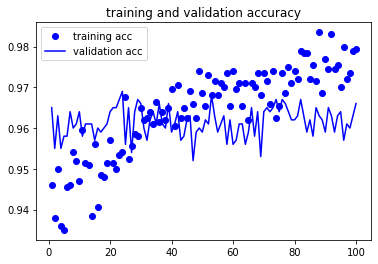

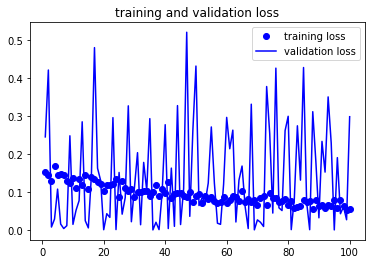

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

This looks like overfitting. I should try  adding dropout for the densely connected layer.

## Print out validation loss and accuracy

In [0]:
val_loss, val_acc = model.evaluate_generator(validation_generator, steps=50)

In [0]:
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

Validation loss: 0.29760631918907166
Validation accuracy: 0.9660000205039978


#Summary:

The conv base was replaced with MobileNet. Performance is somewhat worse, especially in terms of validation loss.